<a href="https://colab.research.google.com/github/msc-acse/acse-9-independent-research-project-Garethlomax/blob/baseline_hybrid/VAE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMPORTS

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
# !ls

%cd /content/drive/My \Drive/masters_project/python_modules/MovingMNIST-master

# all torch imports
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader, Dataset
import torchvision.transforms as transforms
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit
from torchvision import models

import matplotlib.pyplot as plt
import h5py

# importing moving mnist test set.
from MovingMNIST import MovingMNIST

%cd /content/drive/My \Drive/masters_project/python_modules/pytorch-summary-master
from torchsummary import summary

# %cd /content/drive/My \Drive/masters_project/python_modules/pytorch_modelsize-master

%cd /content/drive/My \Drive/masters_project/python_modules/pytorchvis-master

!pip install torchviz

torch.backends.cudnn.benchmark = True
torch.backends.cudnn.enabled = True




/content/drive/My Drive/masters_project/python_modules/MovingMNIST-master
/content/drive/My Drive/masters_project/python_modules/pytorch-summary-master
[Errno 2] No such file or directory: '/content/drive/My Drive/masters_project/python_modules/pytorchvis-master'
/content/drive/My Drive/masters_project/python_modules/pytorch-summary-master


# MODEL 

In [0]:
# alex_net = models.A
# alex = models.alexnet(pretrained = True)

# # make conditioned - give the decoder the last output of encoder as input.
# class Enc_Dec(nn.Module):
#     def __init__(self):
#         super(Enc_Dec, self).__init__()
        
#         self.

In [0]:
# alex.features[0] = nn.Conv2d(1,64, kernel_size = (11,11), stride = (4,4), padding = (2,2))
# for i, params in enumerate(alex.parameters()):
#     if (i==1):
#         print(params.data)



# Encoder
NON VARIATIONAL

In [0]:
class encoder(nn.Module):
    def __init__(self, in_channels, image_dims):
        super(encoder, self).__init__()
        self.image_dims = image_dims # list of channels, height, width
        self.in_chan = in_channels
        
        """activations """
        self.relu = nn.ReLU()
        self.sig = nn.Sigmoid()
        
        
        # need to decide how deep the input is
        """convolution encoding """
        self.c1 = nn.Conv2d(self.in_chan, 32, kernel_size = 4, stride = 2)
        
        self.c2 = nn.Conv2d(32, 64, kernel_size = 4, stride = 2)
        
        self.c3 = nn.Conv2d(64, 128, kernel_size = 4, stride = 2)
        
        self.c4 = nn.Conv2d(128, 256, kernel_size = 4, stride = 2)
        
        self.relu = nn.ReLU()
        self.sig = nn.Sigmoid()
        
        """ fully connected layer """
        
        self.fc1 = nn.Linear(1024,128)
        
        self.fc2 = nn.Linear(128,1024)
        
        self.fc3 = nn.Linear(1024,1024)
        
        """ decoder convolution"""
        
        self.t1 = nn.ConvTranspose2d(1024, 128, kernel_size=5, stride=2)
        
        self.t2 = nn.ConvTranspose2d(128, 64, kernel_size=5, stride=2)
        
        self.t3 = nn.ConvTranspose2d(64, 32, kernel_size=5, stride=2)
        
        self.t4 = nn.ConvTranspose2d(32, self.in_chan, kernel_size=5, stride=2)
        
    
    def encode(self, x):
        x = self.relu(self.c1(x))
        x = self.relu(self.c2(x))
        x = self.relu(self.c3(x))
        x = self.relu(self.c4(x))
        return x
    
    def fc_layers(self, x):
        #first we flatten
        # -1 in pytorch view is the same as -1 in numpy reshape
        x = x.view(x.size(0), -1) # using view terminology
        
        # fully connected layers
        # this is an autoencoder with no variation, so no distribution sampling
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.fc3(x)
        # x.size(0) allows for variable batch sizes.
        size = 1024 # size of flattened array going in?
        x = x.view(x.size(0), size, 1, 1)
#         x = x.view(-1, self.image_dims[0], self.image_dims[1], self.image_dims[2])
        
        # now we reshape the image back into the square. 
        return x
    
    def decode(self, x):
#         print(x.shape)
        x = self.relu(self.t1(x))
        x = self.relu(self.t2(x))
        x = self.relu(self.t3(x))
        x = self.relu(self.t4(x))
        return x
        
    def forward(self, x):
        x = self.encode(x)
        x = self.fc_layers(x)
        x = self.decode(x)
        x = self.sig(x)
        return x
    
        
        
    
        
        
        
        
        
        
        

In [0]:
x = torch.randn([1,1,64,64])


In [0]:
test = encoder(1, [1,64,64])


In [66]:
test.eval()

encoder(
  (relu): ReLU()
  (sig): Sigmoid()
  (c1): Conv2d(1, 32, kernel_size=(4, 4), stride=(2, 2))
  (c2): Conv2d(32, 64, kernel_size=(4, 4), stride=(2, 2))
  (c3): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2))
  (c4): Conv2d(128, 256, kernel_size=(4, 4), stride=(2, 2))
  (fc1): Linear(in_features=1024, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=1024, bias=True)
  (fc3): Linear(in_features=1024, out_features=1024, bias=True)
  (t1): ConvTranspose2d(1024, 128, kernel_size=(5, 5), stride=(2, 2))
  (t2): ConvTranspose2d(128, 64, kernel_size=(5, 5), stride=(2, 2))
  (t3): ConvTranspose2d(64, 32, kernel_size=(5, 5), stride=(2, 2))
  (t4): ConvTranspose2d(32, 1, kernel_size=(5, 5), stride=(2, 2))
)

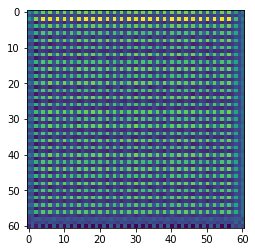

In [69]:
with torch.no_grad():
    out = test(x)
#     out.detatch()
    plt.imshow(out[0][0])